<a href="https://colab.research.google.com/github/deskaygraphics/My_geoai_Project/blob/main/Patching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install geoai-py

In [1]:
data = "/content/drive/MyDrive/GeoAi/naip_data_LSU/m_3009148_nw_15_030_20230503_20240209.tif"

In [2]:
import geoai

===== RASTER INFORMATION: /content/drive/MyDrive/GeoAi/naip_data_LSU/m_3009148_nw_15_030_20230503_20240209.tif =====
Driver: GTiff
Dimensions: 22417 x 25430 pixels
Number of bands: 4
Data type: uint8
Coordinate Reference System: EPSG:26915
Georeferenced Bounds: BoundingBox(left=679871.7, bottom=3354602.1, right=686596.7999999999, top=3362231.1)
Pixel Resolution: 0.3, 0.3
NoData Value: None

----- Band Statistics -----
Band 1:
  Min: 1.00
  Max: 255.00
  Mean: 114.65
  Std Dev: 46.45
Band 2:
  Min: 1.00
  Max: 255.00
  Mean: 126.81
  Std Dev: 36.70
Band 3:
  Min: 1.00
  Max: 255.00
  Mean: 95.29
  Std Dev: 40.53
Band 4:
  Min: 15.00
  Max: 255.00
  Mean: 157.81
  Std Dev: 31.54


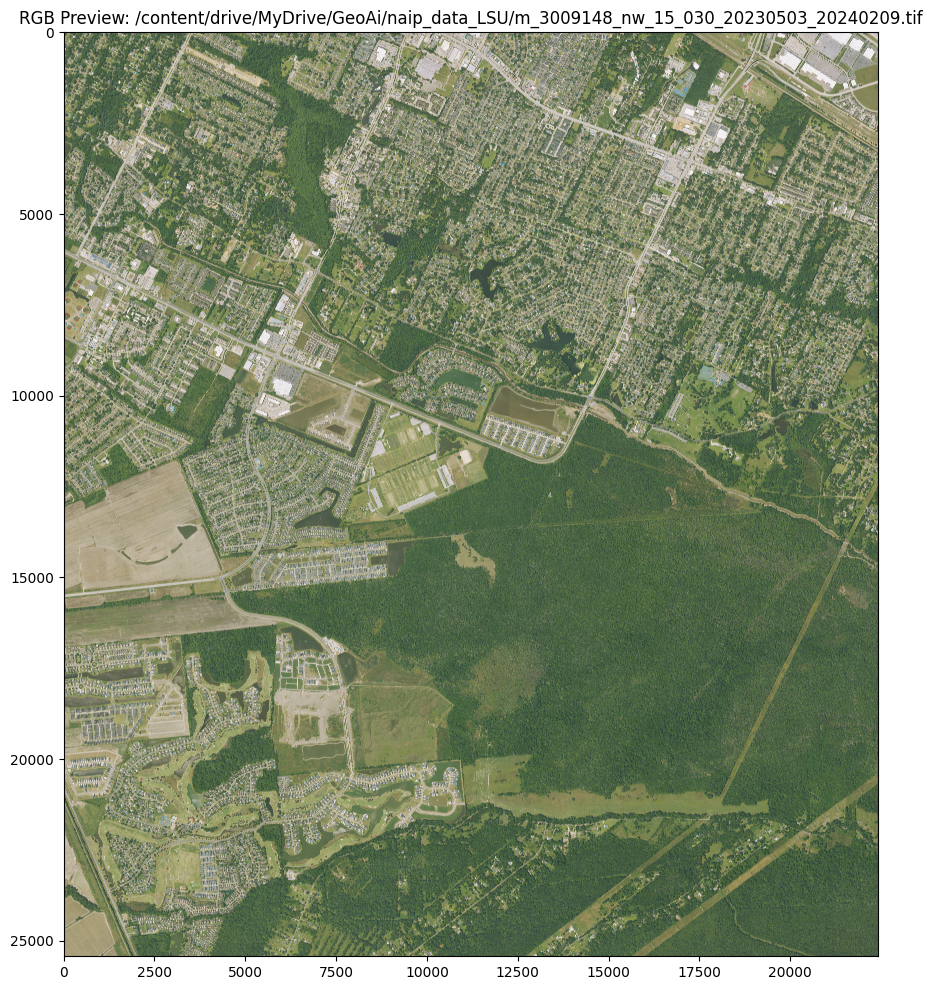

In [4]:
geoai.print_raster_info(data, figsize=(15, 12))

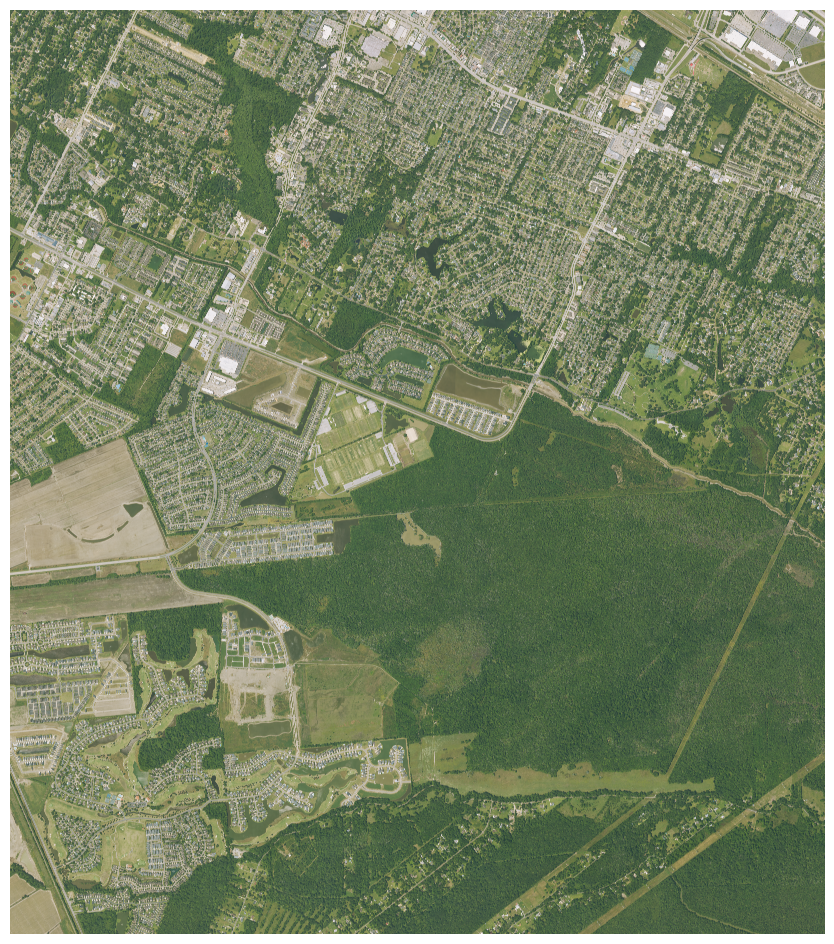

In [3]:
geoai.view_image(data, figsize=(15, 12))

In [9]:
import matplotlib.pyplot as plt
import cv2

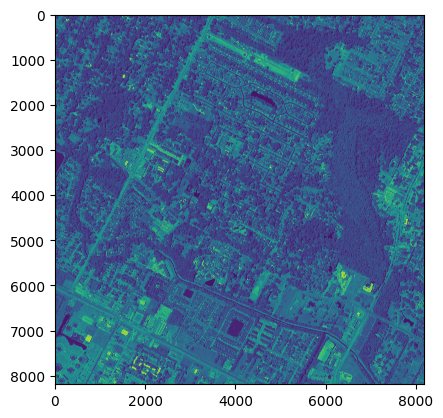

In [10]:
temp_img = cv2.imread("/content/drive/MyDrive/GeoAi/naip_data_LSU/tiles_new/images/tile_000000.tif") #3 channels / spectral bands
plt.imshow(temp_img[:,:,2]) #View each channel...

In [4]:
# prompt: Dimensions: 22417 x 25430 pixels
# Number of bands: 4
# Data type: uint8
# Coordinate Reference System: EPSG:26915
# Georeferenced Bounds: BoundingBox(left=679871.7, bottom=3354602.1, right=686596.7999999999, top=3362231.1)
# Pixel Resolution: 0.3, 0.3
# NoData Value: None is my image info if am to divide this image into tiles of 1024, how many images will i get from that

import math

width = 22417
height = 25430
tile_size = 8192
# Calculate the number of tiles in each dimension
num_tiles_width = math.ceil(width / tile_size)
num_tiles_height = math.ceil(height / tile_size)

# Calculate the total number of tiles
total_tiles = num_tiles_width * num_tiles_height

print(f"Total number of tiles: {total_tiles}")


Total number of tiles: 12


In [5]:
import rasterio
from rasterio.windows import Window
import numpy as np

In [6]:
def patchify(image_path, tile_size):
  with rasterio.open(image_path) as src:
    width = src.width
    height = src.height
    profile = src.profile
    num_tiles_width = math.ceil(width / tile_size)
    num_tiles_height = math.ceil(height / tile_size)
    patches = []
    for i in range(num_tiles_width):
      for j in range(num_tiles_height):
        x_start = i * tile_size
        y_start = j * tile_size
        x_end = min((i + 1) * tile_size, width)
        y_end = min((j + 1) * tile_size, height)
        window = Window(x_start, y_start, x_end - x_start, y_end - y_start)
        patch = src.read(window=window)
        patches.append(patch)
    return patches, profile

image_path = "/content/drive/MyDrive/GeoAi/naip_data_LSU/m_3009148_nw_15_030_20230503_20240209.tif"
tile_size = 8192
patches, profile = patchify(image_path, tile_size)

# Now you can work with the 'patches' and 'profile' variables
# For example, print the number of patches:
print(f"Number of patches: {len(patches)}")

# Or print the shape of the first patch:
if patches:  # Check if the patches list is not empty
    print(f"Shape of the first patch: {patches[0].shape}")


Number of patches: 12
Shape of the first patch: (4, 8192, 8192)


In [9]:
def patchify(image_path, tile_size):
  with rasterio.open(image_path) as src:
    width = src.width
    height = src.height
    profile = src.profile
    num_tiles_width = math.ceil(width / tile_size)
    num_tiles_height = math.ceil(height / tile_size)

    patches = []

    for i in range(num_tiles_width):
      for j in range(num_tiles_height):
        x_start = i * tile_size
        y_start = j * tile_size
        x_end = min((i + 1) * tile_size, width)
        y_end = min((j + 1) * tile_size, height)

        window = Window(x_start, y_start, x_end - x_start, y_end - y_start)

        patch = src.read(window=window)
        patches.append(patch)

    return patches, profile

image_path = "/content/drive/MyDrive/GeoAi/naip_data_LSU/m_3009148_nw_15_030_20230503_20240209.tif"
tile_size = 8192
patches, profile = patchify(image_path, tile_size)

print(f"Number of patches: {len(patches)}")

Number of patches: 12


In [7]:
tiles = geoai.export_geotiff_tiles(
    data,
    out_folder="/content/drive/MyDrive/GeoAi/naip_data_LSU/tiles_new",
    in_class_data=data,
    tile_size=8192,
    stride = 8192,
    buffer_radius=0,
    create_overview=True,
)

Detected in_class_data as raster: /content/drive/MyDrive/GeoAi/naip_data_LSU/m_3009148_nw_15_030_20230503_20240209.tif
Raster CRS: EPSG:26915
Raster dimensions: 22417 x 25430

Raster info for /content/drive/MyDrive/GeoAi/naip_data_LSU/m_3009148_nw_15_030_20230503_20240209.tif:
  CRS: EPSG:26915
  Dimensions: 22417 x 25430
  Resolution: (0.3, 0.3)
  Bands: 4
  Bounds: BoundingBox(left=679871.7, bottom=3354602.1, right=686596.7999999999, top=3362231.1)
Found 222 unique classes in raster: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 15

Generated: 12, With features: 12: 100%|██████████| 12/12 [08:24<00:00, 42.03s/it]


Overview image saved to /content/drive/MyDrive/GeoAi/naip_data_LSU/tiles_new/overview.png

------- Export Summary -------
Total tiles exported: 12
Tiles with features: 12 (100.0%)
Average feature pixels per tile: 134065457.2
Output saved to: /content/drive/MyDrive/GeoAi/naip_data_LSU/tiles_new

------- Georeference Verification -------


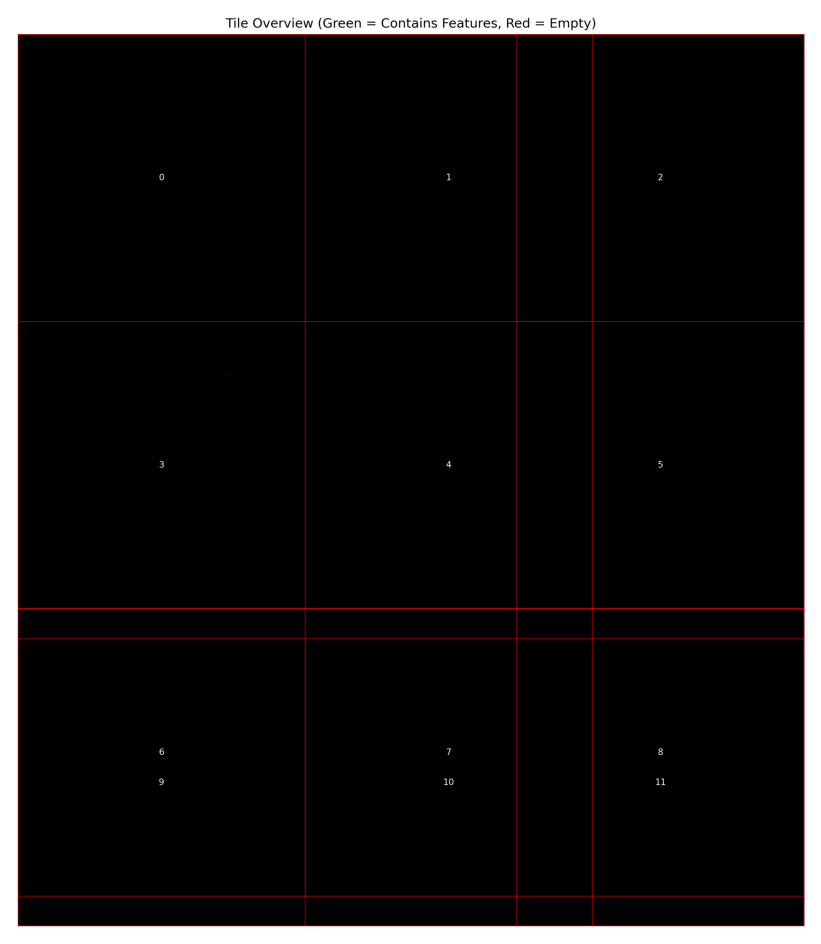

In [8]:
geoai.view_image("/content/drive/MyDrive/GeoAi/naip_data_LSU/tiles_new/overview.png", figsize=(15, 12))